In [130]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten #search
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation



In [131]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\data.csv')

In [132]:
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 'diff_sym_hos'
]
x=train_data[feature_cols]
y=train_data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

Trying Tensor Flow and tuning hyperparameters 
1. no. of units 
2. Activation function
3. No of layers 

1. trying to change in no. of units in each layer

In [133]:
model = Sequential([
     # dense layer 1
    Dense(256, activation='sigmoid'),  
    
    # dense layer 2
    Dense(128, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])

In [134]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
history= model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, validation_split=0.2)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 2.3392 - accuracy: 0.0000e+00 - val_loss: 1.9737 - val_accuracy: 0.1570
Epoch 2/10
1/1 [==============================] - 0s 184ms/step - loss: 1.8812 - accuracy: 0.1781 - val_loss: 1.5929 - val_accuracy: 0.8430
Epoch 3/10
1/1 [==============================] - 0s 187ms/step - loss: 1.4813 - accuracy: 0.8882 - val_loss: 1.2884 - val_accuracy: 0.8430
Epoch 4/10
1/1 [==============================] - 0s 229ms/step - loss: 1.1592 - accuracy: 0.8882 - val_loss: 1.0692 - val_accuracy: 0.8430
Epoch 5/10
1/1 [==============================] - 0s 138ms/step - loss: 0.9241 - accuracy: 0.8882 - val_loss: 0.9282 - val_accuracy: 0.8430
Epoch 6/10
1/1 [==============================] - 0s 92ms/step - loss: 0.7690 - accuracy: 0.8882 - val_loss: 0.8458 - val_accuracy: 0.8430
Epoch 7/10
1/1 [==============================] - 0s 82ms/step - loss: 0.6748 - accuracy: 0.8882 - val_loss: 0.8002 - val_accuracy: 0.8430
Epoch 8/10
1/1 [=====

In [136]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.537605345249176, 0.892307698726654]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


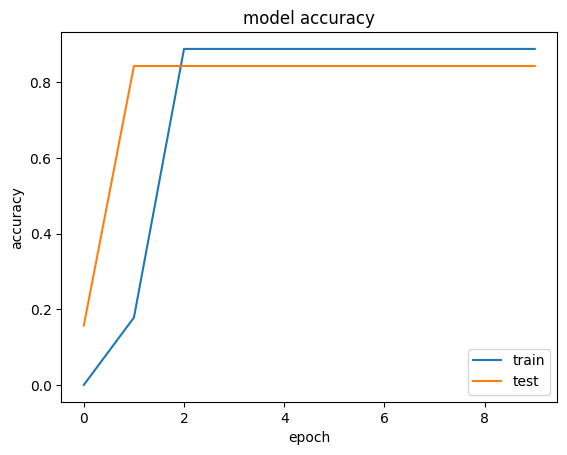

In [137]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


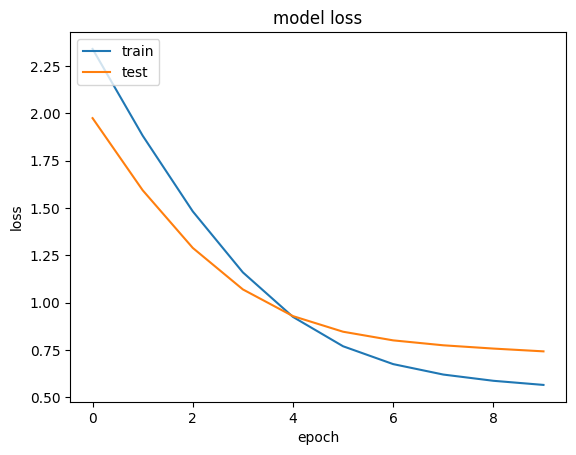

In [138]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

Adding more units

In [139]:
model1 = Sequential([
     # dense layer 1
    Dense(300, activation='relu'),  
    
    # dense layer 2
    Dense(150, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])

In [140]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [141]:
model1.fit(x_train, y_train, epochs=10, 
          batch_size=2000, validation_split=0.2)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.0520 - accuracy: 0.8509 - val_loss: 0.7602 - val_accuracy: 0.8430
Epoch 2/10
1/1 [==============================] - 0s 94ms/step - loss: 0.6189 - accuracy: 0.8882 - val_loss: 0.6372 - val_accuracy: 0.8430
Epoch 3/10
1/1 [==============================] - 0s 80ms/step - loss: 0.4793 - accuracy: 0.8882 - val_loss: 0.5743 - val_accuracy: 0.8430
Epoch 4/10
1/1 [==============================] - 0s 72ms/step - loss: 0.4171 - accuracy: 0.8882 - val_loss: 0.5154 - val_accuracy: 0.8430
Epoch 5/10
1/1 [==============================] - 0s 64ms/step - loss: 0.3693 - accuracy: 0.8882 - val_loss: 0.4588 - val_accuracy: 0.8430
Epoch 6/10
1/1 [==============================] - 0s 70ms/step - loss: 0.3277 - accuracy: 0.8882 - val_loss: 0.4122 - val_accuracy: 0.8430
Epoch 7/10
1/1 [==============================] - 0s 65ms/step - loss: 0.2961 - accuracy: 0.8882 - val_loss: 0.3749 - val_accuracy: 0.8430
Epoch 8/10
1/1 [=============

In [142]:
results_1 = model1.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results_1)

test loss, test acc: [0.2927559018135071, 0.892307698726654]


Changing the optimizer to adagrad and adding one more dense layer

In [143]:
model2 = Sequential([
     # dense layer 1
    Dense(300, activation='sigmoid'),  
    
    # dense layer 2
    Dense(150, activation='sigmoid'), 
    
    # dense layer 3
    Dense(90, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid')
])

In [144]:
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [145]:
model2.fit(x_train, y_train, epochs=10, 
          batch_size=2000, validation_split=0.2)

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 2s 2s/step - loss: 2.0999 - accuracy: 0.0000e+00 - val_loss: 1.8291 - val_accuracy: 0.8430
Epoch 2/10
1/1 [==============================] - 0s 66ms/step - loss: 1.7923 - accuracy: 0.8882 - val_loss: 1.5601 - val_accuracy: 0.8430
Epoch 3/10
1/1 [==============================] - 0s 64ms/step - loss: 1.5133 - accuracy: 0.8882 - val_loss: 1.3254 - val_accuracy: 0.8430
Epoch 4/10
1/1 [==============================] - 0s 66ms/step - loss: 1.2687 - accuracy: 0.8882 - val_loss: 1.1285 - val_accuracy: 0.8430
Epoch 5/10
1/1 [==============================] - 0s 65ms/step - loss: 1.0622 - accuracy: 0.8882 - val_loss: 0.9702 - val_accuracy: 0.8430
Epoch 6/10
1/1 [==============================] - 0s 67ms/step - loss: 0.8946 - accuracy: 0.8882 - val_loss: 0.8482 - val_accuracy: 0.8430
Epoch 7/10
1/1 [==============================] - 0s 66ms/step - loss: 0.7639 - accuracy: 0.8882 - val_loss: 0.7579 - val_accuracy: 0.8430
Epoch 8/10
1/1 [====================

In [146]:
results_2 = model2.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results_2)

test loss, test acc: [0.4953577518463135, 0.892307698726654]


Trying activation function linear

Change in the activation function , make the first layer linear activation function

In [147]:
model3 = Sequential([
     # dense layer 1
    Dense(300, activation='linear'),  
    
    # dense layer 2
    Dense(150, activation='sigmoid'), 
  
    
      # output layer
    Dense(10, activation='sigmoid')
])

In [148]:
model3.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
model3.fit(x_train, y_train, epochs=10, 
          batch_size=2000, validation_split=0.2)

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 2s 2s/step - loss: 2.5168 - accuracy: 0.0000e+00 - val_loss: 1.4138 - val_accuracy: 0.3554
Epoch 2/10
1/1 [==============================] - 0s 125ms/step - loss: 1.3713 - accuracy: 0.4079 - val_loss: 0.7915 - val_accuracy: 0.8430
Epoch 3/10
1/1 [==============================] - 0s 161ms/step - loss: 0.7229 - accuracy: 0.8882 - val_loss: 0.5916 - val_accuracy: 0.8430
Epoch 4/10
1/1 [==============================] - 0s 121ms/step - loss: 0.4836 - accuracy: 0.8882 - val_loss: 0.5531 - val_accuracy: 0.8430
Epoch 5/10
1/1 [==============================] - 0s 125ms/step - loss: 0.4227 - accuracy: 0.8882 - val_loss: 0.5361 - val_accuracy: 0.8430
Epoch 6/10
1/1 [==============================] - 0s 110ms/step - loss: 0.3960 - accuracy: 0.8882 - val_loss: 0.4975 - val_accuracy: 0.8430
Epoch 7/10
1/1 [==============================] - 0s 62ms/step - loss: 0.3625 - accuracy: 0.8882 - val_loss: 0.4580 - val_accuracy: 0.8430
Epoch 8/10
1/1 [===============

In [150]:
results_3 = model3.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results_3)

test loss, test acc: [0.32903146743774414, 0.892307698726654]


In [151]:
model4 = Sequential([
     # dense layer 1
    Dense(300, activation='linear'),  
    
    # dense layer 2
    Dense(150, activation='sigmoid'), 
  
    
      # output layer
    Dense(10, activation='sigmoid')
])

In [152]:
model4.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [153]:
model4.fit(x_train, y_train, epochs=10, 
          batch_size=2000, validation_split=0.2)

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 14s 14s/step - loss: 4.0117 - accuracy: 0.0000e+00 - val_loss: 3.3591 - val_accuracy: 0.0083
Epoch 2/10
1/1 [==============================] - 0s 156ms/step - loss: 3.4453 - accuracy: 0.0000e+00 - val_loss: 2.9208 - val_accuracy: 0.0165
Epoch 3/10
1/1 [==============================] - 0s 153ms/step - loss: 2.9979 - accuracy: 0.0021 - val_loss: 2.5834 - val_accuracy: 0.0413
Epoch 4/10
1/1 [==============================] - 0s 170ms/step - loss: 2.6520 - accuracy: 0.0041 - val_loss: 2.2856 - val_accuracy: 0.0331
Epoch 5/10
1/1 [==============================] - 0s 163ms/step - loss: 2.3448 - accuracy: 0.0021 - val_loss: 2.0660 - val_accuracy: 0.2810
Epoch 6/10
1/1 [==============================] - 0s 95ms/step - loss: 2.1127 - accuracy: 0.2712 - val_loss: 1.8831 - val_accuracy: 0.5950
Epoch 7/10
1/1 [==============================] - 0s 47ms/step - loss: 1.9203 - accuracy: 0.5673 - val_loss: 1.7307 - val_accuracy: 0.7025
Epoch 8/10
1/1 [==========

In [154]:
results_4 = model4.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results_4)

test loss, test acc: [1.4360381364822388, 0.7615384459495544]


In [155]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)


In [156]:
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [157]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
#nn_bo.maximize(init_points=25, n_iter=4)

In [158]:
#params_nn_ = nn_bo.max['params']
#activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#              'elu', 'exponential', LeakyReLU,'relu']
#params_nn_['activation'] = activationL[round(params_nn_['activation'])]
#params_nn_

Trying to find the inner node values

In [159]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes): # values inside hidden layer nodes
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [160]:
FindLayerNodesLinear(5, 50, 10)

[50, 40, 30, 20, 10]